In [168]:
import pandas as pd
import plotly.express as px
import inflection

In [169]:
df = pd.read_csv("C:\\Users\\jatos\\Desktop\\JA\\Material Data Science\Datasets\\archive\\zomato.csv")
#df1 = df.copy()

In [170]:
# Funções

# Renomear as colunas do DataFrame:
def rename_columns(dataframe):
    df1 = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df
df1 = rename_columns(df)
#Preenchimento do nome dos países:
COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}
def country_name(country_id):
    return COUNTRIES[country_id]

#-------------------------------------------------------
#Criação do Tipo de Categoria de Comida

def create_price_type(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"
df1['price_range'] = df1['price_range'].apply(lambda x: create_price_type(x))
#--------------------------------------------------------
# Criação do nome das Cores

COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}
def color_name(color_code):
    return COLORS[color_code]
df1['rating_color'] = df1['rating_color'].apply(lambda x: color_name(x))
#--------------------------------------------
# Limpando os dados
df1 = df1.dropna(subset=['cuisines'])
df1['cuisines'] = df1.loc[:, 'cuisines'].apply(lambda x: x.split(",")[0])

# Convertendo a coluna dos códigos
df1['country_code'] = df1['country_code'].apply(lambda x: country_name(x))



C:\Users\jatos\AppData\Local\Temp\ipykernel_10404\926354510.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jatos\AppData\Local\Temp\ipykernel_10404\926354510.py:71: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



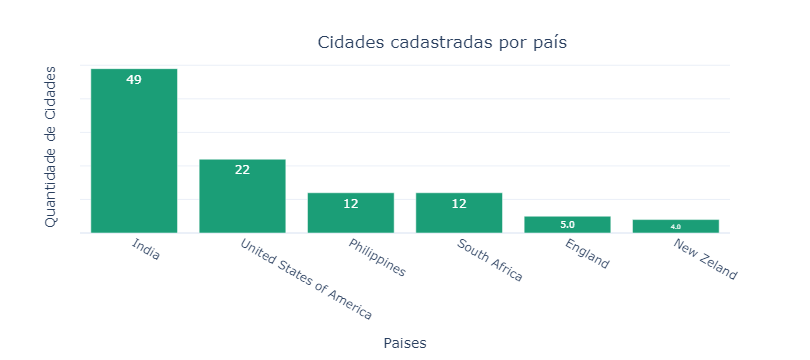

In [113]:
# 1. Qual o nome do país que possui mais cidades registradas?
df1 = df.drop_duplicates(subset='city', keep='first')
mais_cidades = (dff.loc[:, ['country_code', 'city']]
                .groupby('country_code')
                .count().sort_values('city', ascending=False).reset_index())
df_aux2 = mais_cidades.head(6)
fig = px.bar(df_aux2, x='country_code', y='city', 
       labels = {'country_code':'Paises', 'city':'Quantidade de Cidades'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='city')
fig.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig.update_yaxes(showticklabels = False)
fig.update_layout(title={'text':'Cidades cadastradas por país', 
                         'y':0.9,
                         'x':0.7})
fig.show()

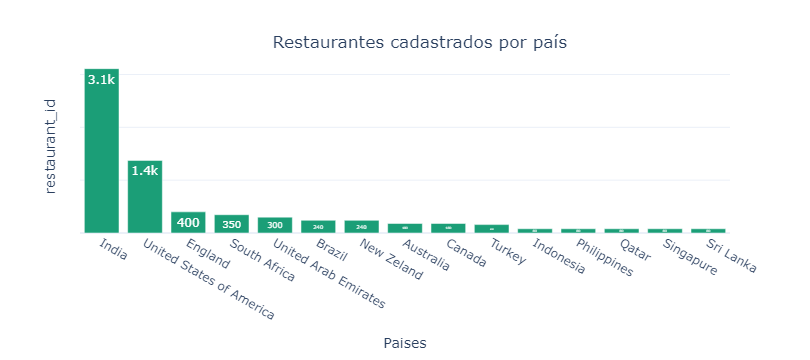

In [128]:
# 2. Qual o nome do país que possui mais restaurantes registrados?
mais_rest1 = (df1.loc[:, ['restaurant_id', 'country_code']]
             .groupby('country_code').nunique()
             .sort_values('restaurant_id', ascending = False).reset_index())

fig1 = px.bar(mais_rest1, x='country_code', y='restaurant_id', 
       labels = {'country_code':'Paises', 'restaurant_name':'Quantidade de Restaurantes'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='restaurant_id')
fig1.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig1.update_yaxes(showticklabels = False)
fig1.update_layout(title={'text':'Restaurantes cadastrados por país', 
                         'y':0.9,
                         'x':0.7})
fig1.show()

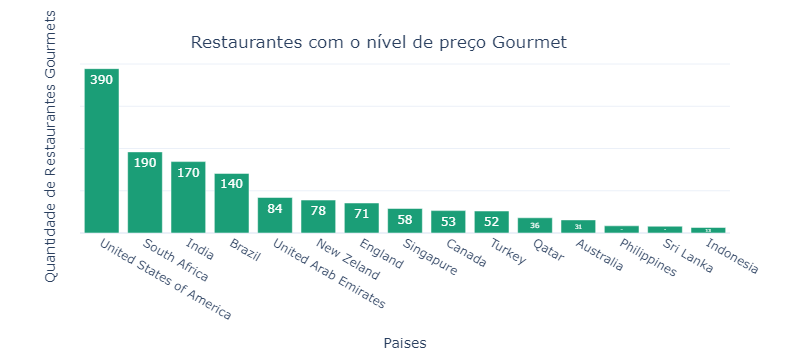

In [127]:
# 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?
linha = (df1['price_range'] == 'gourmet')
df_aux = df1.loc[linha, :]
df_aux = df_aux.drop_duplicates(subset='restaurant_name', keep='first')
range_four = (df_aux.loc[:, ['country_code', 'price_range']]
                 .groupby('country_code').count()
                 .sort_values('price_range', ascending = False).reset_index())
fig_1 = px.bar(range_four, x='country_code', y='price_range', 
       labels = {'country_code':'Paises', 'price_range':'Quantidade de Restaurantes Gourmets'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='price_range')
fig_1.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_1.update_yaxes(showticklabels = False)
fig_1.update_layout(title={'text':'Restaurantes com o nível de preço Gourmet', 
                         'y':0.9,
                         'x':0.7})
fig_1.show()

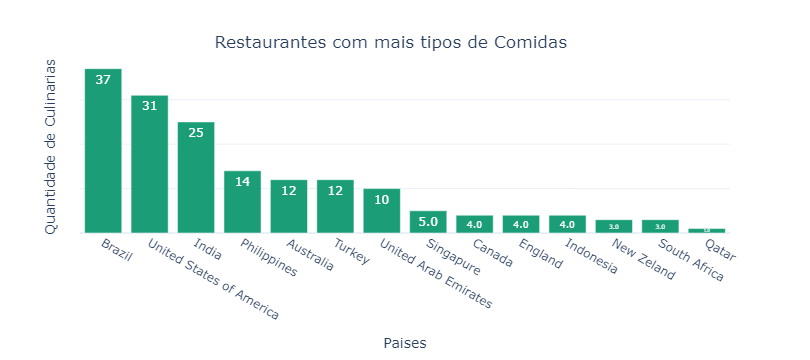

In [129]:
# 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?
df_aux = df1.drop_duplicates(subset = 'cuisines', keep='first')
cousine = (df_aux.loc[:, ['country_code', 'cuisines']]
          .groupby('country_code').count()
          .sort_values('cuisines', ascending=False).reset_index())
fig_2 = px.bar(cousine, x='country_code', y='cuisines', 
       labels = {'country_code':'Paises', 'cuisines':'Quantidade de Culinarias'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='cuisines')
fig_2.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_2.update_yaxes(showticklabels = False)
fig_2.update_layout(title={'text':'Restaurantes com mais tipos de Comidas', 
                         'y':0.9,
                         'x':0.7})
fig_2.show()

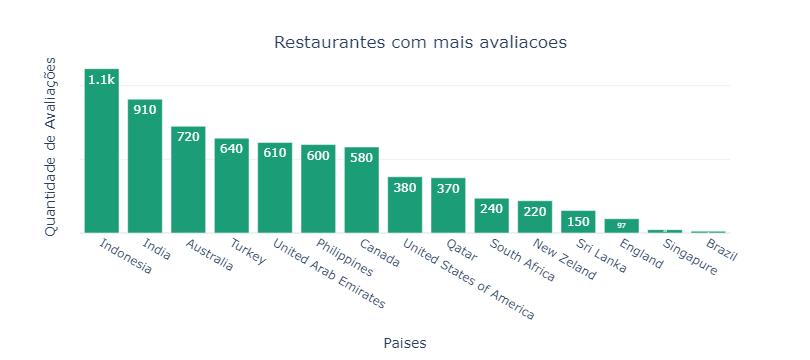

In [145]:
# 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?
df_aux1 = (df1.loc[:, ['country_code', 'votes']]
          .groupby('country_code').mean()
          .sort_values('votes', ascending = False).reset_index())
fig_3 = px.bar(df_aux1, x='country_code', y='votes', 
       labels = {'country_code':'Paises', 'votes':'Quantidade de Avaliações'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='votes')
fig_3.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_3.update_yaxes(showticklabels = False)
fig_3.update_layout(title={'text':'Restaurantes com mais avaliacoes', 
                         'y':0.9,
                         'x':0.7})
fig_3.show()

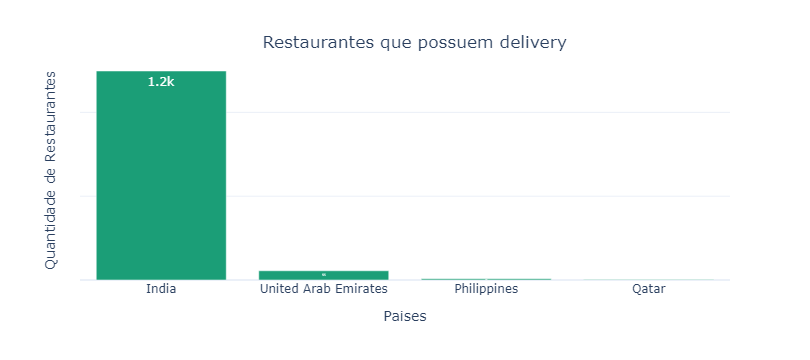

In [154]:
# 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?
linha = df1['is_delivering_now'] == 1
df_aux1 = df1.loc[linha, :]
delivery = (df_aux1.loc[:, ['country_code', 'is_delivering_now']]
            .groupby('country_code').count()
            .sort_values('is_delivering_now', ascending = False).reset_index())
fig_4 = px.bar(delivery, x='country_code', y='is_delivering_now', 
       labels = {'country_code':'Paises', 'is_delivering_now':'Quantidade de Restaurantes'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='is_delivering_now')
fig_4.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_4.update_yaxes(showticklabels = False)
fig_4.update_layout(title={'text':'Restaurantes que possuem delivery', 
                         'y':0.9,
                         'x':0.7})
fig_4.show()

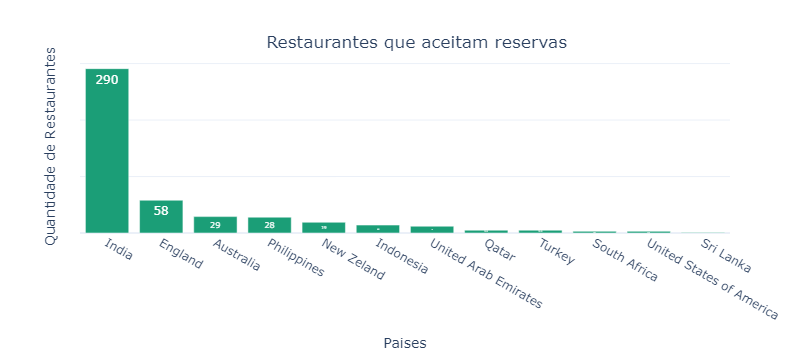

In [156]:
# 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?
linha = df1['has_table_booking'] == 1
df1.drop_duplicates(subset='restaurant_id', keep='first')
df1_aux = df1.loc[linha, :]
reservas = (df1_aux.loc[:, ['country_code', 'has_table_booking']]
          .groupby('country_code').count()
          .sort_values('has_table_booking', ascending=False).reset_index())
fig_5 = px.bar(reservas, x='country_code', y='has_table_booking', 
       labels = {'country_code':'Paises', 'has_table_booking':'Quantidade de Restaurantes'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='has_table_booking')
fig_5.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_5.update_yaxes(showticklabels = False)
fig_5.update_layout(title={'text':'Restaurantes que aceitam reservas', 
                            'y':0.9,
                            'x':0.7})
fig_5.show()

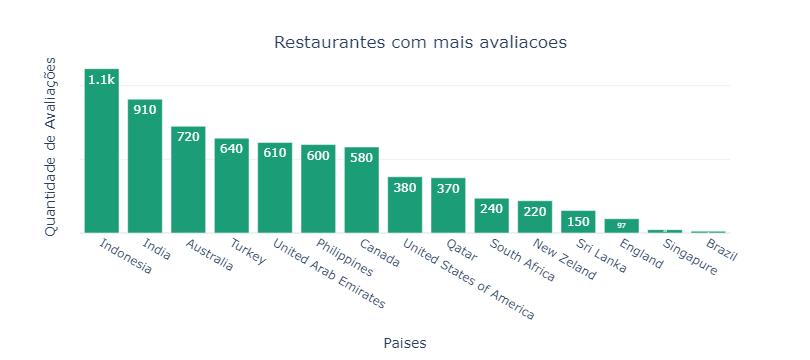

In [157]:
# 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?
df_aux1 = (df1.loc[:, ['country_code', 'votes']]
          .groupby('country_code').mean()
          .sort_values('votes', ascending = False).reset_index())
fig_3 = px.bar(df_aux1, x='country_code', y='votes', 
       labels = {'country_code':'Paises', 'votes':'Quantidade de Avaliações'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='votes')
fig_3.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_3.update_yaxes(showticklabels = False)
fig_3.update_layout(title={'text':'Restaurantes com mais avaliacoes', 
                         'y':0.9,
                         'x':0.7})
fig_3.show()

In [13]:
# 9. Qual o nome do país que possui, na média, a maior nota média registrada?
maior_nota = (df1.loc[:, ['Country Code', 'Aggregate rating']]
              .groupby('Country Code').mean()
              .sort_values('Aggregate rating', ascending = False).reset_index())


Indonesia


In [14]:
# 10. Qual o nome do país que possui, na média, a menor nota média registrada?
maior_nota = (df1.loc[:, ['Country Code', 'Aggregate rating']]
              .groupby('Country Code').mean()
              .sort_values('Aggregate rating').reset_index())
print(maior_nota.iloc[0,0])

Brazil


In [161]:
# 11. Qual a média de preço de um prato para dois por país?
for_two = (df1.loc[:, ['average_cost_for_two', 'country_code']]
           .groupby('country_code').mean()
           .sort_values('average_cost_for_two', ascending=False))
fig_ = px.bar(for_two, x='country_code', y='average_cost_for_two', 
       labels = {'country_code':'Paises', 'average_cost_for_two':'Media de precos'}, 
       color_discrete_sequence=px.colors.qualitative.Dark2, 
       template='plotly_white', 
       text='average_cost_for_two')
fig_.update_traces(textposition='inside', texttemplate = '%{text:.2s}')
fig_.update_yaxes(showticklabels = False)
fig_.update_layout(title={'text':'Media de preco em um prato para dois',
                          'y':0.9,
                          'x':0.7})
fig_.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['average_cost_for_two'] but received: country_code

In [171]:
df1.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')